# DAM\-I Fall 2022 Group 3 Final Project

## Professor: Brandon Bean



### Project Bike Cycles Team Members:

**Project Manager/Team Leader:** Karlee Revers, Nebraska Wesleyan University

**Data Architect:** Jack Yeates, Wells College

**Data Visualization Specialist:** Ruth Hayes, Nebraska Wesleyan University

**Data Analyst:** Max Rademacher, Nebraska Wesleyan University



### Project Overview.

The Outdoor Performance Center \(OPC\) has hired RI2 to assist with its acquisition of a small boutique mountain bike company, Ord Cycles.  You will be required to analyze, join, visualize, and discuss the data in an effort to solve several key questions OPC has about the data as part of its larger acquisition of Ord Cycles. Your project will consist of a 10\-15 minute video powerpoint presentation and accompanying Jupyter Notebook.

\+the impact of the project \(step 2\) & steps 4\-6 on the assignment?



### Data Overview.

Our project includes 14 quantitative and qualitative datasets provided by the OPC in the form of Excel data sheets; there is data on warehouses, suppliers, products, taxes, and orders. There is also a ledger composed of over 2600 customers. Each dataset has at least two attributes, but the largest has 13. We suspect some of the datasets to be closely related. For example, The number of orders should be proportional to the number of returns. 



### Exploratory Data Analysis.



Hopefully, sales increase throughout the years. We also expect to see a correlation between the customer's state and the warehouse they received products from. It will be interesting to see how strong customer retention is compared to new customers as well as the most popular bike components or most active states. 


### Data Querying.



##### Are OPC mountain bike sales consistent over the available period of data?



In [158]:
from datascience import *
import numpy as np
from scipy import stats
from datetime import date
from dateutil.parser import parse
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


In [37]:
def left(s, length):
    return str(s[:length])

orders = Table.read_table("orders.csv")
years = orders.column("ord_date")

list = []
for item in years:
    list.append(left(item,4))


orders = Table.read_table("orders.csv")
order_consistency = Table().with_columns(
    "ord_date", list,
    "order_tot", orders.column("order_tot"))
final = order_consistency.group("ord_date",sum).show()

ord_date,order_tot sum
2000,728574
2001,696021
2002,565160
2003,523463
2004,577862
2005,635804
2006,754774
2007,598245
2008,607584
2009,651428


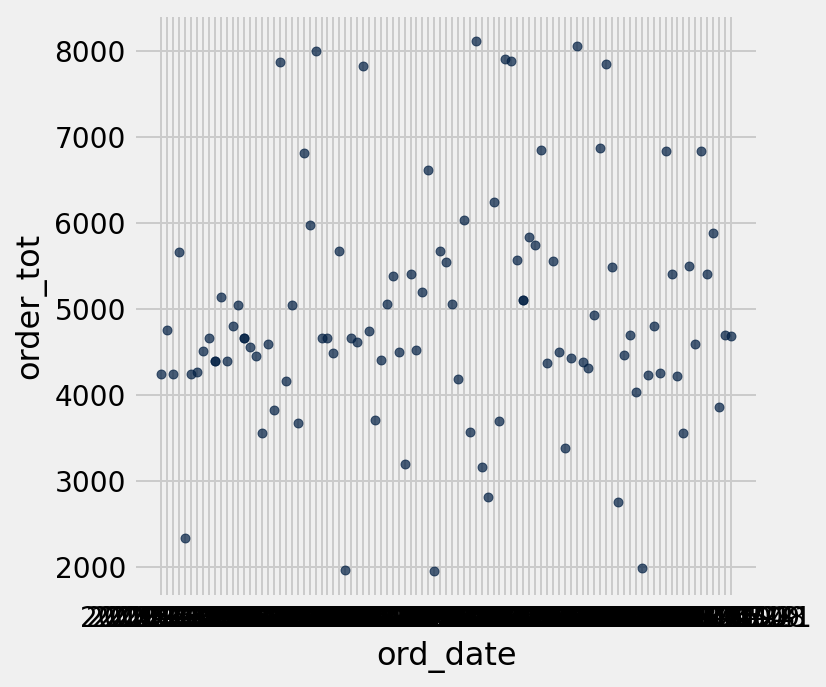

In [38]:
order_consistency_plots = orders.sample(100)
order_consistency_plots.scatter("ord_date","order_tot")

It looks like over the nearly 20 years of data, sales were very consistent. 



##### What is the most popular configuration \(Brand and components\) of mountain bikes sold by OPC over the available period? What are the most/least successful bikes?



In [185]:
#configurations best/worst
Configuration_components = components.column("comp_cat")
def letterFrequencies(words):
    d= dict()
    for k in words:
        if k in d.keys():
            d[k]+= 1
        else:
            d[k]= 1
    return d
letterFrequencies(Configuration_components)

{'handlebar': 45,
 'brake': 24,
 'wheel': 42,
 'fork': 56,
 'shock': 30,
 'shifter': 10,
 'cassette': 9,
 'derailleur': 8,
 'dropper': 29,
 'chain_ring': 17,
 'Missing Sku': 1,
 'nan': 1}

In [189]:
#most/ least popular bikes
bikes=orders.column("prod_id")
letterFrequencies(bikes)


{57: 43,
 42: 38,
 41: 40,
 15: 40,
 36: 29,
 35: 46,
 43: 40,
 10: 23,
 40: 44,
 49: 38,
 25: 35,
 58: 45,
 2: 32,
 59: 48,
 69: 42,
 3: 37,
 60: 50,
 53: 34,
 23: 43,
 54: 26,
 16: 35,
 31: 49,
 38: 34,
 6: 35,
 14: 37,
 61: 40,
 56: 38,
 63: 42,
 46: 39,
 47: 49,
 1: 42,
 8: 31,
 39: 47,
 17: 35,
 18: 30,
 12: 29,
 66: 37,
 28: 24,
 11: 40,
 32: 36,
 7: 39,
 13: 31,
 62: 35,
 21: 37,
 44: 42,
 64: 41,
 68: 34,
 65: 35,
 48: 37,
 19: 40,
 5: 34,
 33: 34,
 37: 36,
 27: 47,
 4: 29,
 52: 37,
 22: 36,
 45: 32,
 51: 34,
 9: 31,
 30: 43,
 20: 35,
 24: 45,
 67: 36,
 50: 40,
 55: 37,
 26: 37,
 34: 51,
 29: 32}

##### What distribution issues are there, if any, within the OPC warehouses?



In [4]:
warehouse_orders = Table.read_table("customerwarehouseorders.csv")
warehouse_volume = warehouse_orders.group("warehouse_id")
warehouse_volume

warehouse_id,count
1,884
2,859
3,856


None of the warehouses are used disproportionately \(assuming each warehouse has the facilities to handle the same workload\). Additionally, we need to investigate whether warehouses are delivering to outside of their natural jurisdictions. 



##### What are the total amounts of inventory processed by the OPC warehouses over the reported period?



In [5]:
warehouse_orders = Table.read_table("customerwarehouseorders.csv")
inventory_processed = len(warehouse_orders.column("ord_id"))
inventory_processed

2599

##### What warehouses, if any, are shipping orders from outside their region?



In [103]:
#Instructor comment: Try doing a pivot table on your joined table where the warehouse is shown in the left (y) column, and the states are shown in the right (X) columns. Then you can relabel the warehouse_id to teh state digraph.

#I grouped cus_id, cus_state, and warehouse_id together which should help to identify shipping orders
customers = Table.read_table("customers.csv")
states = customers.select("cus_id","cus_state")
states_and_orders = orders.join("cus_id",states)
#states_and_orders.select("cus_id","cus_state","warehouse_id").where("cus_state",are.equal_to(6)).group("warehouse_id")
#warehouse 1 is in CA (west coastish), wh 2 is in TX (midwestish), wh 3 is in OH (east coastish)
states_and_orders.pivot("cus_state","warehouse_id").relabeled("warehouse_id","Warehouse & State Table")

#should we group/sort by warehouse_id to see where most of them deliver?
#count wh_id: 1-884, 2-859, 3-856

#region_array = make_array(1,2,1,1,2,3,3,2,2,1,2,3,2,3,2,3,2,3,2,3,1,3,3,3,2,1,3,1,3,1,2)
#relevantly: state 1 is AK= wh_id 1,state 2 is AL= wh_id 2, state 6 is CT= wh_id 3
#wrong warehouses: AK1-52 total from 2&3, AL2-52 total from 1&3, CT3-56 total from 1&2

#so the answer to the question is all of them

/usr/local/lib/python3.8/dist-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


Warehouse & State Table,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,32,29,30,27,27,28,26,25,32,36,30,21,29,29,33,25,25,19,33,36,29,30,32,28,22,38,34,34,28,37
2,26,21,23,23,26,35,33,22,24,24,25,34,26,38,32,36,33,31,29,29,31,40,26,31,21,38,23,25,36,18
3,26,23,34,22,28,28,34,33,31,33,21,32,32,30,24,37,29,25,22,22,30,19,32,33,28,26,30,33,31,28


All the warehouses are shipping orders from outside their region. Each warehouse ships to every state, in a fairly even distribution spread.



##### What is the ratio of customer join date to first order? How many customers waited longer than one week to order a bike after joining?



In [179]:
order_date = orders.select("ord_date", "cus_id")
join_date = customers.select("cus_join_date", "cus_id")
join_and_order = order_date.join("cus_id",join_date)

order_dates = join_and_order.select("ord_date")
join_dates = join_and_order.select("cus_join_date")
order_dates_array = order_dates.column(0)
join_dates_array = join_dates.column(0)
join_and_order

#join_and_order.group("cus_id").where("count",are.above(1))
#cus_id 1728 & 1731 both appear twice

cus_id,ord_date,cus_join_date
1,2019-05-05,2007-06-07
2,2006-11-10,2005-02-28
3,2014-08-31,2014-03-20
4,2011-02-03,2010-09-25
5,2017-01-19,2004-04-29
6,2002-03-30,2007-01-06
7,2011-01-08,2009-08-08
8,2003-03-26,2016-09-24
9,2019-03-09,2019-05-03
10,2015-10-14,2019-06-14


In [190]:
def days_since(ord_date,cus_join_date):
    ord_date = parse(ord_date)
    cus_join_date = parse(cus_join_date)
    days_since_join = ord_date - cus_join_date
    return days_since_join.days

long_days = join_and_order.with_column(
    "days_since_joining", join_and_order.apply(days_since, "ord_date","cus_join_date")
)

long_days.where("days_since_joining", are.between(0,8))
#long_days.where(">1_week", are.above(7)).where("cus_id",are.equal_to("1728"))
#1728 - none
#1731 - none

#1223 + 10 rows = 1233 customers! out of 2597
#1233/2597 = .47477859 -> 47.48%
#so a little under half do it over a week later!

cus_id,ord_date,cus_join_date,days_since_joining
173,2005-07-25,2005-07-20,5
555,2005-07-05,2005-07-03,2
1490,2018-04-07,2018-04-01,6


##### What are the customer orders by State \(count/cost\)?



In [150]:
count_by_state = customers.select("cus_state", "tot_ord_value").group("cus_state")
sum_by_state = customers.select("cus_state", "tot_ord_value").group("cus_state",sum)
orders_by_state = Table().with_columns(
    "state", sum_by_state.column("cus_state"),
    "count", count_by_state.column("count"),
    "total", sum_by_state.column("tot_ord_value sum"),
    "cost/count", sum_by_state.column("tot_ord_value sum")/count_by_state.column("count"))
orders_by_state.sort("cost/count",descending = True).show()

state,count,total,cost/count
20,88,1.70225e+06,19343.8
27,87,1.67777e+06,19284.7
29,95,1.81748e+06,19131.3
2,73,1.39614e+06,19125.1
4,73,1.37504e+06,18836.1
21,90,1.69008e+06,18778.6
11,76,1.42424e+06,18740
6,91,1.69968e+06,18677.8
23,91,1.68744e+06,18543.3
22,91,1.67681e+06,18426.5


**Create a new column in the customer table and identify customers as potential churners using the following metrics:**

Risk: Potential; Returns: 3\+; Returns value: 1000.00\+

Risk: Moderate; Returns: 2\-3; Returns value: 500.00\-999.99

Risk: Low; Returns: 1\-; Returns value: 0\-499.99


cus_id,cus_num,cus_last_name,cus_first_name,cus_add_num,cus_address,cus_city,cus_state,cus_zip,cus_phone,cus_join_date,cus_app_cd,cus_app_num,tot_ord_qty,tot_ord_value
2600,nan,Holzer,Yeni,8617,High Noon Street,Hattiesburg,17,39401,7833472627,2020-11-22,5,OPC85554622,60,10641.5
2601,nan,Hull,Tancredo,7673,Cedat Camp Road,Oswego,19,13126,5154255063,2020-04-19,9,OPC86688258,49,24585.6
2602,nan,Sokol,Teodor,965,Southampton,Salt Lake City,26,84119,8802052764,2020-04-15,14,OPC87710870,48,8514.29
2603,nan,Barnes,Theo,270,High Noon Ave,Coram,19,11727,2779494240,2020-09-14,18,OPC78993136,76,19173.1
2604,nan,Tempest,Simone,751,East Shadow Brook Dr.,Pataskala,20,43062,7692163675,2020-06-24,11,OPC86812641,45,27325.7
2605,nan,Bullock,Pankaj,7524,Van Dyke St.,Southampton,22,18966,2812450867,2020-03-20,3,OPC85939415,11,1214.88
2606,nan,Ware,Reina,656,Grand Ave,Los Angeles,4,90008,3902290668,2020-09-21,6,OPC86472716,64,6718.85
2607,nan,Ray,Rosalin,8564,Old Woodland Rd,Cranston,23,2920,7944432375,2020-06-06,9,OPC87091916,43,14012.6
2608,nan,Stark,Herb,7291,Race St.,Ithaca,19,14850,2978433949,2020-06-27,5,OPC87321099,28,4054.52
2609,nan,Bohme,Bohuslav,135,Homewood Ln,Merrimack,19,3054,3147113467,2020-12-12,19,OPC86853764,96,15178.4


##### 1st Additional Query



In [120]:
#Though so far the distributions are fairly normal. OPC should consider making a 4th warehouse on the east coast. In the geography of where they are located there is a way farther gap than needed for orders on the east coast. Providing 4 warehouses there will not only help decrease shipping time to them but also allow the company to store more bikes.

##### 2nd Additional Query



In [0]:
#They should be made aware of how many people order within the first week of joining. They have a good number with over 47%, but they could always increase with a few marketing tricks and strategies such as a little discount for joining and first time ordering. This will likely lure customers to join and sign up, creating a more loyal customer to buy from them.

### Project Conclusions.

##### This section should include a review of the questions asked and plain language answers to those questions. This is the overall feedback section to the OPC leadership. Draw any conclusions you have here.



Sales for OPC are somewhat consistent for the past two decades.

**What is the most popular configuration \(Brand and components\) of mountain bikes sold by OPC over the available period? What are the most/least successful bikes?**

- The most popular Configuration for components is the handlebar with the least popular being the Missing SKU. The most popular supplier is 28. The most popular Bike is the Altitude Full\-Suspension Mountain Bike, and the least popular is the SB100 Full\-Suspension Mountain Bike.

None of the warehouses are used disproportionately \(assuming each warehouse has the facilities to handle the same workload\).

The three warehouses processed a total inventory amount of 2599 over the reported period.

All the warehouses are shipping orders from outside their region. Each warehouse ships to every state, in a fairly even distribution spread.

Just under half \(47%\) of customers ordered a bike over a week after joining.

Ohio, Virginia, and West Virginia are the three highest count/cost buyer states.

If the customers bought quality bikes, then they won't be buying again soon but they will most likely buy again.

Orders heavily come from the East Coast, where the closest warehouse is almost into the Midwest.

Given only three customers ordered a bike within a week of ordering, a marketing campaign for first\-time buyers & joiners might help lure customers to OPC stores.


### Future Recommendations.



In order to increase sales, we suggest looking into streamlining warehouse efficiency. Make sure customers' orders get matched to a respective warehouse that makes sense geographically. Also, consider diversifying smaller warehouses across the nation instead of three large entities. This will help focus on supplying the people where they are already at. If nothing else, a fourth warehouse on the East Coast would help given the high amount of demand coming from states in the area. We also suggest focusing marketing efforts on the Altitude Full\-Suspension Mountain Bike, and possibly discontinuing, or at least reviewing in greater detail, the SB100 Full\-Suspension Mountain Bike. Additionally, looking into creating a first\-time discount if a new customer order and joins at the same time might be worth it, so that they sign up sooner and they get more offers and whatever other ads you want to send them.
